# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.21.3'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

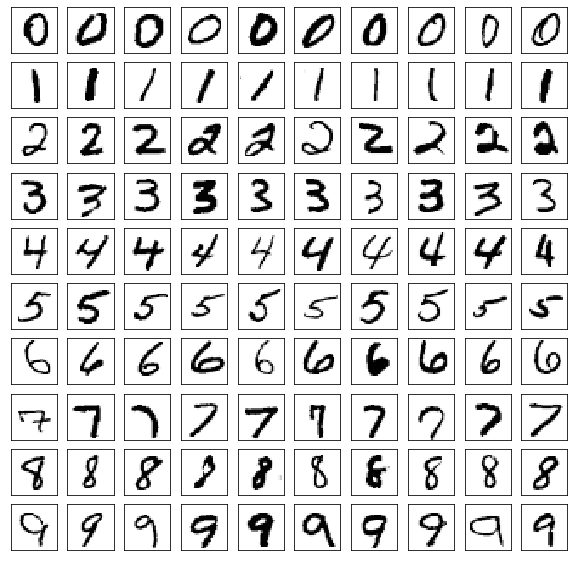

In [4]:
def P1(num_examples=10):

### STUDENT START ###
    plt.rcParams['figure.figsize'] = [10.0, 10.0]
    plt.figure()
    plt.rc('gray')
    
    # display 10 examples each row for each digit
    for i in range(10):
        train_data_digit = train_data[train_labels==str(i)]
        for j in range(num_examples):
            train_data_img = np.reshape(train_data_digit[j],(-1,28))
            
            # set a 10x10 subplots with no x and y ticks
            plt.subplot(10, 10, j+1+i*10)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(train_data_img, cmap='Greys')
### STUDENT END ###

P1(10)



### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):

### STUDENT START ###
    # for each iteration, produce a k-nearest neighbor model and train it on the mini train set
    for k in k_values:
        neigh = KNeighborsClassifier(n_neighbors = k)
        neigh.fit(mini_train_data, mini_train_labels)
        result=classification_report(neigh.predict(dev_data),dev_labels,labels=list(range(10)))
        print("Results of Nearest-Neighbor model for k =",k)
        print(result)
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of Nearest-Neighbor model for k = 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.98      0.89      0.93       131
           2       0.79      0.90      0.84        93
           3       0.87      0.93      0.90        90
           4       0.85      0.91      0.88        86
           5       0.88      0.86      0.87        90
           6       0.92      0.92      0.92       102
           7       0.94      0.85      0.89       113
           8       0.77      0.83      0.80        87
           9       0.86      0.80      0.83       102

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of Nearest-Neighbor model for k = 3
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           1       0.98      0.82      0.90       141
           2       0.78      0.90      0.84        92
           3       0.89      0.89      0.89        97
           4       0.88      0.84      0.86        96
           5       0.84      0.94      0.89        79
           6       0.91      0.91      0.91       102
           7       0.94      0.85      0.89       113
           8       0.74      0.85      0.80        82
           9       0.79      0.84      0.82        89

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.88      0.88      0.88      1000



C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of Nearest-Neighbor model for k = 5
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.99      0.81      0.89       144
           2       0.74      0.96      0.83        81
           3       0.91      0.87      0.89       101
           4       0.88      0.89      0.89        91
           5       0.85      0.96      0.90        78
           6       0.91      0.91      0.91       102
           7       0.95      0.80      0.87       121
           8       0.77      0.84      0.80        86
           9       0.84      0.89      0.86        90

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.89      0.88      0.88      1000



C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of Nearest-Neighbor model for k = 7
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       106
           1       0.99      0.80      0.89       146
           2       0.72      0.96      0.82        79
           3       0.91      0.86      0.88       102
           4       0.87      0.91      0.89        88
           5       0.84      0.96      0.90        77
           6       0.92      0.93      0.93       101
           7       0.94      0.80      0.86       120
           8       0.76      0.83      0.79        86
           9       0.83      0.83      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.87      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Results of Nearest-Neighbor model for k = 9
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.99      0.78      0.87 

C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


**ANSWER: According to the F1-scores, which is the weighted average of precision and recall, the most difficult digit for the 1-NN model to recognize is 8, with a F1-score of 0.8, the lowest amongst all digits.**

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    # Loop through the list of train sizes
    # Each iteration i, train a 1-NN model on the subset data which contains the 
    # first x number of data within the train set, where X is the ith number in train_sizes.
    for num in train_sizes:
        start = time.time()
        subset_data = train_data[:num]
        subset_labels = train_labels[:num]
        neigh = KNeighborsClassifier(n_neighbors = 1)
        neigh.fit(subset_data, subset_labels)
        
        # Evaluate on the dev set
        predicted = neigh.predict(dev_data)
        result=classification_report(predicted,dev_labels,labels=list(range(10)))
        
        # Store accuracy into a list and capture the end time of the opreations
        accuracy = accuracy_score(dev_labels, predicted, normalize=True)
        accuracies.append(accuracy)
        stop = time.time()
        
        print("Results of 1-NN model for a training set of size", num)
        print(result)

        print("The running time of 1-NN model operations for a training set of", num, "is", 
              round(stop - start,2), "seconds")
    return accuracies
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 100
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       122
           1       0.99      0.70      0.82       168
           2       0.51      0.77      0.61        70
           3       0.68      0.72      0.70        92
           4       0.78      0.49      0.61       146
           5       0.72      0.81      0.76        78
           6       0.65      0.87      0.74        76
           7       0.89      0.69      0.78       132
           8       0.45      0.71      0.55        59
           9       0.40      0.67      0.50        57

   micro avg       0.70      0.70      0.70      1000
   macro avg       0.69      0.72      0.69      1000
weighted avg       0.76      0.70      0.71      1000

The running time of 1-NN model operations for a training set of 100 is 0.14 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 200
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       103
           1       0.99      0.78      0.87       150
           2       0.58      0.86      0.70        72
           3       0.81      0.79      0.80       100
           4       0.79      0.65      0.71       113
           5       0.78      0.79      0.79        87
           6       0.83      0.91      0.87        93
           7       0.89      0.75      0.82       121
           8       0.63      0.75      0.68        79
           9       0.68      0.79      0.73        82

   micro avg       0.79      0.79      0.79      1000
   macro avg       0.79      0.80      0.78      1000
weighted avg       0.81      0.79      0.79      1000

The running time of 1-NN model operations for a training set of 200 is 0.25 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 400
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       103
           1       0.99      0.84      0.91       139
           2       0.63      0.94      0.76        71
           3       0.75      0.78      0.76        94
           4       0.82      0.71      0.76       105
           5       0.76      0.78      0.77        86
           6       0.91      0.93      0.92       100
           7       0.89      0.74      0.81       123
           8       0.66      0.71      0.69        87
           9       0.72      0.74      0.73        92

   micro avg       0.81      0.81      0.81      1000
   macro avg       0.81      0.81      0.80      1000
weighted avg       0.82      0.81      0.81      1000

The running time of 1-NN model operations for a training set of 400 is 0.47 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 800
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       107
           1       0.98      0.89      0.94       130
           2       0.77      0.92      0.84        89
           3       0.82      0.89      0.86        90
           4       0.79      0.89      0.84        82
           5       0.84      0.80      0.82        92
           6       0.92      0.91      0.92       103
           7       0.94      0.82      0.88       117
           8       0.78      0.84      0.81        87
           9       0.82      0.76      0.79       103

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.87      0.87      0.87      1000

The running time of 1-NN model operations for a training set of 800 is 0.92 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 1600
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       107
           1       0.98      0.93      0.95       125
           2       0.84      0.93      0.88        96
           3       0.86      0.94      0.90        88
           4       0.86      0.95      0.90        83
           5       0.88      0.86      0.87        90
           6       0.93      0.93      0.93       102
           7       0.97      0.88      0.92       113
           8       0.83      0.85      0.84        92
           9       0.92      0.84      0.87       104

   micro avg       0.91      0.91      0.91      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000

The running time of 1-NN model operations for a training set of 1600 is 1.82 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 3200
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.98      0.94      0.96       124
           2       0.85      0.95      0.90        95
           3       0.89      0.91      0.90        94
           4       0.97      0.95      0.96        94
           5       0.90      0.89      0.89        89
           6       0.97      0.94      0.96       105
           7       0.94      0.92      0.93       104
           8       0.83      0.90      0.86        87
           9       0.95      0.90      0.92       100

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.93      0.93      0.92      1000
weighted avg       0.93      0.93      0.93      1000

The running time of 1-NN model operations for a training set of 3200 is 3.59 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 6400
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       106
           1       1.00      0.95      0.98       124
           2       0.92      0.97      0.95       101
           3       0.91      0.92      0.91        96
           4       0.96      0.93      0.94        95
           5       0.92      0.93      0.93        87
           6       0.97      0.93      0.95       106
           7       0.96      0.92      0.94       106
           8       0.83      0.94      0.88        83
           9       0.93      0.92      0.92        96

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

The running time of 1-NN model operations for a training set of 6400 is 7.24 seconds


C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Results of 1-NN model for a training set of size 12800
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       107
           1       0.99      0.96      0.97       122
           2       0.95      0.98      0.97       103
           3       0.90      0.95      0.92        92
           4       0.95      0.95      0.95        92
           5       0.93      0.94      0.94        87
           6       0.97      0.95      0.96       104
           7       0.98      0.94      0.96       106
           8       0.88      0.93      0.91        89
           9       0.96      0.93      0.94        98

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

The running time of 1-NN model operations for a training set of 12800 is 14.8 seconds
Results of 1-NN model for a training set of size 25600
              precision    recall  f1-score  

C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

In [7]:
def plt_acc(X, Y1, Y2, xlabel, ylabel, title):
    # a plot helper function to plot the actual and predicted accuracies vs.
    # training set size
    plt.plot(X, Y1, label = "true accuracy")
    plt.plot(X, Y2, label = "predicted accuracy")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    

The R^2 of the first model is 0.4177006634161019
The predicted accuracies for training set sizes 60000, 120000, and 1000000 are
[1.23617317 1.63742805 7.52249967]

The R^2 of the first model is 0.9068304252436642
The predicted accuracies for log of training set sizes 60000, 120000, and 1000000 are
[1.03358792 1.06432125 1.15833125]

The R^2 of the first model is 0.9395242859897991
The predicted accuracy odds for log of training set sizes 60000, 120000, and 1000000 are
[26.07837794 28.93291195 37.66462802]


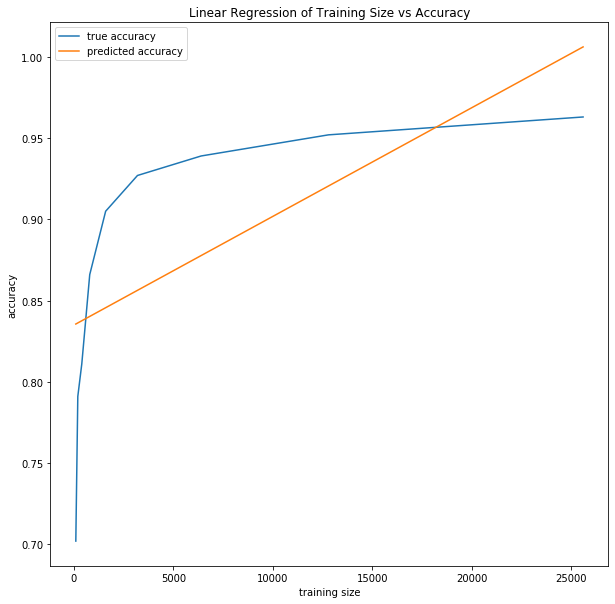

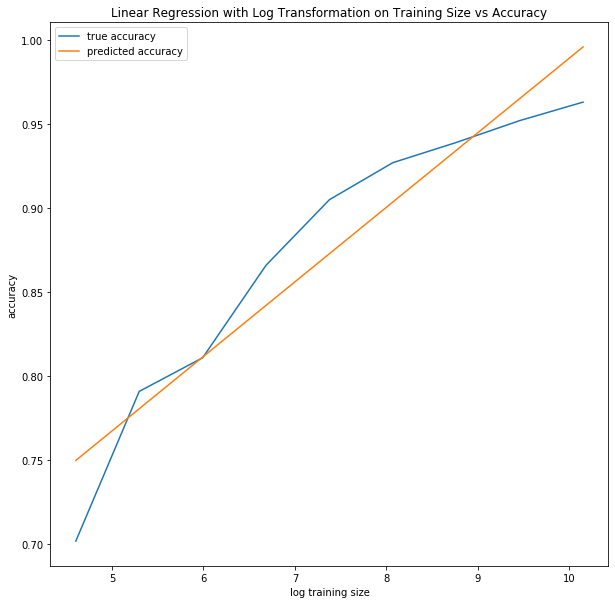

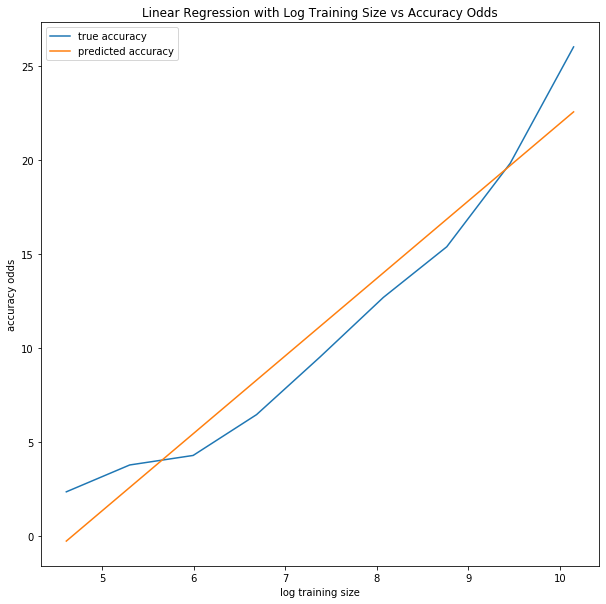

In [8]:
def P4():

### STUDENT START ###
    # Model 1: explanatory variable = training set sizes
    # response variable = accuracies
    X = np.array(train_sizes).reshape(-1,1)
    Y = np.array(accuracies)
    Mod1 = LinearRegression()
    Mod1.fit(X, Y)
    print("The R^2 of the first model is", Mod1.score(X, Y))
    print("The predicted accuracies for training set sizes 60000, 120000, and 1000000 are")
    print(Mod1.predict(np.array([60000, 120000, 1000000]).reshape(-1,1)))
    
    # Model 2: explanatory variable = log(training set sizes)
    # response variable = accuracies
    Mod2 = LinearRegression()
    Mod2.fit(np.log(X), Y)
    print("\nThe R^2 of the first model is", Mod2.score(np.log(X), Y))
    print("The predicted accuracies for log of training set sizes 60000, 120000, and 1000000 are")
    print(Mod2.predict(np.array(np.log([60000, 120000, 1000000])).reshape(-1,1)))
    
    # Model 1: explanatory variable = log(training set sizes)
    # response variable = accuracy odds
    transY = Y/(1-Y)
    Mod3 = LinearRegression()
    Mod3.fit(np.log(X),transY)
    pred3 = Mod3.predict(np.array(np.log([60000, 120000, 1000000])).reshape(-1,1))
    print("\nThe R^2 of the first model is", Mod3.score(np.log(X),transY))
    print("The predicted accuracy odds for log of training set sizes 60000, 120000, and 1000000 are")
    print(pred3)
    
    plt.figure()
    plt_acc(X, Y, Mod1.predict(X), "training size", "accuracy", "Linear Regression of Training Size vs Accuracy")
    plt_acc(np.log(X), Y, Mod2.predict(np.log(X)), "log training size", "accuracy", 
            "Linear Regression with Log Transformation on Training Size vs Accuracy")
    plt_acc(np.log(X), transY, Mod3.predict(np.log(X)),"log training size", "accuracy odds", 
            "Linear Regression with Log Training Size vs Accuracy Odds")

### STUDENT END ###

P4()

**ANSWER: A simple linear regression on accuracy vs training set sizes is wrong because it ignores the domain restrictions of the outcome variables, accuracy ratios. By definition, the accuracy ratios range from 0 to 1. However, the outcome of the model have no range restriction; for example, for a training set size of 60000, the model predicts an accuracy of 1.24, which is not possible in reality. In order to correct this, We apply the transformation on the explanatory variable. First, we apply the log transformation on the training set size and run linear regression on this transformed variable vs accuracies. The second model has a better R^2 of 0.90 than model 1, but still does not restrict the range of the response variable. By transforming the outcome variable to odds ratio, we can free up the range of the outcome variable. Hence, we run model 3 on accuracy odds vs log training size. The model 3 has a R^2 of 0.94, which is the highest amongst three models. Using model 3, we predict the accuracy odds to be 26.08 for a training size of 60000, 28.93 for a training size of 120000, and 37.66 for a training size of 1000000. The intepretation of the accuracy odds is that the 1-NN model can accurately predict about 26 out of 27 digits for a training size of 60000.**

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

In [9]:
def P5():

### STUDENT START ###
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(mini_train_data, mini_train_labels)
    predicted = neigh.predict(dev_data)
    result=classification_report(predicted,dev_labels,labels=list(range(10)))
    print("The performance of the 1-NN model on the dev data set:")
    print(result)
    print("The confusion matrix of the 1-NN model on the dev data set:")
    print(confusion_matrix(dev_labels, predicted, labels=list(map(str, range(10)))))
    return neigh
### STUDENT END ###

model = P5()

The performance of the 1-NN model on the dev data set:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.98      0.89      0.93       131
           2       0.79      0.90      0.84        93
           3       0.87      0.93      0.90        90
           4       0.85      0.91      0.88        86
           5       0.88      0.86      0.87        90
           6       0.92      0.92      0.92       102
           7       0.94      0.85      0.89       113
           8       0.77      0.83      0.80        87
           9       0.86      0.80      0.83       102

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

The confusion matrix of the 1-NN model on the dev data set:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   

C:\Users\Ambe Chen\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


11


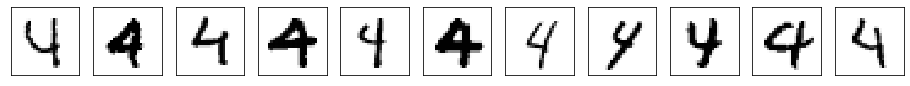

In [10]:
def P5_showimg(y_pred, y_true):
    mistakes = dev_data[np.logical_and(model.predict(dev_data)==str(y_pred), dev_labels==str(y_true))]
    print(len(mistakes))
    plt.rcParams['figure.figsize'] = [16.0, 2.0]
    plt.figure()
    plt.rc('gray')
    for i in range(len(mistakes)):
        mis_img = np.reshape(mistakes[i],(-1,28))
        plt.subplot(1, len(mistakes), i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(mis_img, cmap='Greys')
        
P5_showimg(9, 4)

**ANSWER: The model confuses the most often (11 times) on the (4, 9) pair where the actual value is 4 and the predicted value is 9.**

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

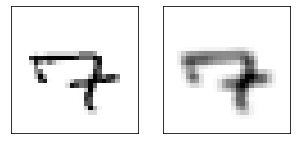

Model 1 has an accuracy of 0.884
Model 2 has an accuracy of 0.907
Model 3 has an accuracy of 0.868
Model 4 has an accuracy of 0.905


In [23]:
def wgt_surrounding(grid, idx, edge_len):
    
    # the function finds the 8 neighbour values of each pixel and weight them equally
    surrounding = np.zeros(9)
    pixel_grid = np.reshape(grid,(-1,edge_len))
    x =  idx // edge_len     # row index
    y =  idx % edge_len      # column index
    wgt_factor = 1/9         # equally weight the original value and the 8 neighbour values
    
    # Find values in adjacent up, down, left and right pixels
    if x > 0:
        surrounding[1] = pixel_grid[x-1][y]
    if x < edge_len - 1:
        surrounding[7] = pixel_grid[x+1][y]
    if y > 0:
        surrounding[3] = pixel_grid[x][y-1]
    if y < edge_len - 1:
        surrounding[5] = pixel_grid[x][y+1]
        
    # Find four adjacent diagonal pixel values
    if x > 0 and y > 0:
        surrounding[0] = pixel_grid[x-1][y-1]
    if x > 0 and y < edge_len - 1:
        surrounding[2] = pixel_grid[x-1][y+1]
    if x < edge_len - 1 and y > 0:
        surrounding[6] = pixel_grid[x+1][y-1]
    if x < edge_len - 1 and y < edge_len - 1:
        surrounding[8] = pixel_grid[x+1][y+1]
        
    surrounding[4] = pixel_grid[x][y]
    surrounding = surrounding * wgt_factor
    
    return surrounding
 
def blur(img):
    
    # the function blurs an image by summing the weighted combinaion of the original
    # value and the 8 neighbour values for each of 28x28 pixels
    blurred_img = np.zeros(len(np.array(img)))
    for i in range(len(np.array(img))):
        avg = sum(wgt_surrounding(img, i, 28))
        blurred_img[i] = avg
    return blurred_img

# test the blur functions 
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(mini_train_data[4].reshape(-1, 28), cmap='Greys')

plt.subplot(1, 2, 2)
plt.imshow(blur(mini_train_data[4]).reshape(-1, 28), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

def blur_set(data_set):
    
    # The function applies blur function to a data set
    filtered_data_set = np.array(data_set)
    for i, val in enumerate(data_set):
        filtered_data_set[i] = blur(val)
    return filtered_data_set

def P6():
    
### STUDENT START ###
    filtered_train_data = blur_set(mini_train_data)
    filtered_dev_data = blur_set(dev_data)
    
    # model 1: no filter
    model1 = KNeighborsClassifier(n_neighbors = 1)
    model1.fit(mini_train_data, mini_train_labels)
    print("Model 1 has an accuracy of", accuracy_score(dev_labels, model1.predict(dev_data), normalize=True))
    
    # model 2: Filter the training data but not the dev data
    model2 = KNeighborsClassifier(n_neighbors = 1)
    model2.fit(filtered_train_data, mini_train_labels)
    print("Model 2 has an accuracy of", accuracy_score(dev_labels, model2.predict(dev_data), normalize=True))
    
    # model 3: Filter the dev data but not the training data
    model3 = KNeighborsClassifier(n_neighbors = 1)
    model3.fit(mini_train_data, mini_train_labels)
    print("Model 3 has an accuracy of", accuracy_score(dev_labels, model3.predict(filtered_dev_data), normalize=True))
    
    # model 4: Filter both training data and dev data
    model4 = KNeighborsClassifier(n_neighbors = 1)
    model4.fit(filtered_train_data, mini_train_labels)
    print("Model 4 has an accuracy of", accuracy_score(dev_labels, model4.predict(filtered_dev_data), normalize=True))

### STUDENT END ###

P6()

**Answer: The simplified Guassian blur filter is built using the method of equally-weighted combination of the original pixel and its eight nearest neighbours. Model 2 delivers the highest accuracy on the dev data set by applying the blur filter to the mini training set but not to the dev set. The accuracy improved slightly by filtering the training data set only, or both the training and dev data sets at the same time.**

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [22]:
def P7():

### STUDENT START ###
    # Bernoulli Naive Bayes Model with binarize parameter 0.1
    model1 = BernoulliNB(binarize = 0.1)
    model1.fit(mini_train_data,mini_train_labels)
    print("The Bernoulli Naive Bayes model has an accuracy of", 
          accuracy_score(dev_labels, model1.predict(dev_data), normalize=True))
    
    # transform pixel values to 0, 1, or 2 by setting the white/gray/black separation threshold to 0.1 and 0.9
    vector_int=np.vectorize(int)
    processed_train_data = vector_int(mini_train_data>=0.1)+vector_int(mini_train_data>=0.9)
    processed_dev_data = vector_int(dev_data>=0.1)+vector_int(dev_data>=0.9)
    
    # Multinomial Naive Bayes model with processed data that have pixel values mapped to either 0,1, or 2
    model2 = MultinomialNB()
    model2.fit(processed_train_data,mini_train_labels)
    print("The Multinomial Naive Bayes model has an accuracy of", 
          accuracy_score(dev_labels, model2.predict(processed_dev_data), normalize=True))
    
### STUDENT END ###

P7()

The Bernoulli Naive Bayes model has an accuracy of 0.814
The Multinomial Naive Bayes model has an accuracy of 0.807


**ANSWER: the Multinomial Naive Bayes model does not improve the results, and its accuracy is even slightly lower than that of the Bernoulli model. This is because the categorizing process done prior to the multinomial model fitting acts like a blur filter but the threholds for defining pixels to be grey are arbitrary and can be adjusted to improve the model accuracy. In addition, the grey threshold violates the independence assumption of the Naive Bayes model. In the Bernoulli model where there is only a feature of white pixel and a feature of black pixel, the two features are independent of each other. However, the Multinomial model has an additional grey feature which is defined based on the area of black hand-writing in a pixel. Hence the grey and black features are correlated.**

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [13]:
def P8(alphas):

### STUDENT START ###
    BNB = BernoulliNB(binarize = 0.0)
    clf = GridSearchCV(BNB, alphas, cv=5, scoring='accuracy', iid=False) 
    clf.fit(mini_train_data,mini_train_labels)
    return clf

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
for params, score in zip(nb.cv_results_['params'], nb.cv_results_['mean_test_score']):
    print("\nAlpha: %r; Accuracy: %f" % (params, score))
    
print()
print("Best alpha = ", nb.best_params_)



Alpha: {'alpha': 1e-10}; Accuracy: 0.812702

Alpha: {'alpha': 0.0001}; Accuracy: 0.820818

Alpha: {'alpha': 0.001}; Accuracy: 0.824850

Alpha: {'alpha': 0.01}; Accuracy: 0.819848

Alpha: {'alpha': 0.1}; Accuracy: 0.817818

Alpha: {'alpha': 0.5}; Accuracy: 0.815816

Alpha: {'alpha': 1.0}; Accuracy: 0.810779

Alpha: {'alpha': 2.0}; Accuracy: 0.804802

Alpha: {'alpha': 10.0}; Accuracy: 0.780584

Best alpha =  {'alpha': 0.001}


**ANSWER: The best value is 0.001 for alpha. When alpha is near 0, the accuracy is 0.812702. By increasing the value of alpha, we introduce a smoothing parameter to the Bernoulli model in order to address situations of 0 occurence of some feature in the training set. However, the model loses accuracy when we introduce too much smoothing.**

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [24]:
from scipy.stats import norm
from sklearn.preprocessing import scale

def P9():

### STUDENT END ###
    clf = GaussianNB()
    clf.fit(mini_train_data,mini_train_labels)
    print("Accuracy of Guassian Naive Bayes model:", clf.score(dev_data, dev_labels))
    print("Mean of thetas of all features:", np.mean(clf.theta_))
    print("Thetas range from", np.min(clf.theta_), "to", np.max(clf.theta_))
    print("Mean of sigmas of all features:", np.mean(clf.sigma_))
    print("Sigmas range from", np.min(clf.sigma_), "to", np.max(clf.sigma_))
    
    # Add random noise to the mini training data and dev data
    noise_train = norm.rvs(np.mean(clf.theta_), np.mean(clf.sigma_), size=np.shape(mini_train_data))
    noise_dev = norm.rvs(np.mean(clf.theta_), np.mean(clf.sigma_), size=np.shape(dev_data))
    noise_train_data = mini_train_data + noise_train
    noise_dev_data =dev_data + noise_dev
    
    # Rescale the training and dev sets to Guassian distribution
    scaled_train_data = np.zeros(np.shape(mini_train_data))
    scaled_dev_data = np.zeros(np.shape(dev_data))
    for i in range(np.shape(mini_train_data)[0]):
        scaled_train_data[i] = scale(mini_train_data[i])
    for i in range(np.shape(dev_data)[0]):
        scaled_dev_data[i] = scale(dev_data[i])
    
    # Apply both normalization and random noise to the training and dev sets
    normalized_train_data = mini_train_data + norm.rvs(size=np.shape(mini_train_data))
    normalized_dev_data =dev_data + norm.rvs(size=np.shape(dev_data))
    
    # train and test on rescaled data
    clf.fit(scaled_train_data,mini_train_labels)
    print("Accuracy of Guassian Naive Bayes model after normalization:", clf.score(scaled_dev_data, dev_labels))
    
    # train and test on data with random noise
    clf.fit(noise_train_data,mini_train_labels)
    print("Accuracy of Guassian Naive Bayes model after adding random noise:", clf.score(noise_dev_data, dev_labels))
    
    # train and test on normalized data
    clf.fit(normalized_train_data,mini_train_labels)
    print("Accuracy of Guassian Naive Bayes model after normalization and adding random noise:", clf.score(normalized_dev_data, dev_labels))
    
### STUDENT END ###

P9()

Accuracy of Guassian Naive Bayes model: 0.593
Mean of thetas of all features: 0.1323391723061708
Thetas range from 0.0 to 0.9612336601307193
Mean of sigmas of all features: 0.05299707504881932
Sigmas range from 2.0143330705113426e-10 to 0.21206426868524297
Accuracy of Guassian Naive Bayes model after normalization: 0.704
Accuracy of Guassian Naive Bayes model after adding random noise: 0.802
Accuracy of Guassian Naive Bayes model after normalization and adding random noise: 0.549


**ANSWER: The Guassian Naive Bayes model did not perform well because features do not follow a Normal distribution and the training data set is small. According to Central Limit Theorem, features would follow a Normal distribution if the data set is large enough. Hence, we can possibly fix the issue by normalizing both the training and dev sets and/or adding random noise which follows a Guassian distribution. From the accuracy scores of the 3 models, we can see that adding random noise helps the model deliver the best performance on the dev data set.**

**Normalization delivers suboptimal results in this case because it is not a required step to perform as we are only comparing the features with each other but do not care about knowing which class the features most likely belongs to.**

**Adding random noise also helps normalize the data sets and it efficiently reduces overfitting and generalization error when the training set is small. Hence it is the best solution to fix the issue in our case.**

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

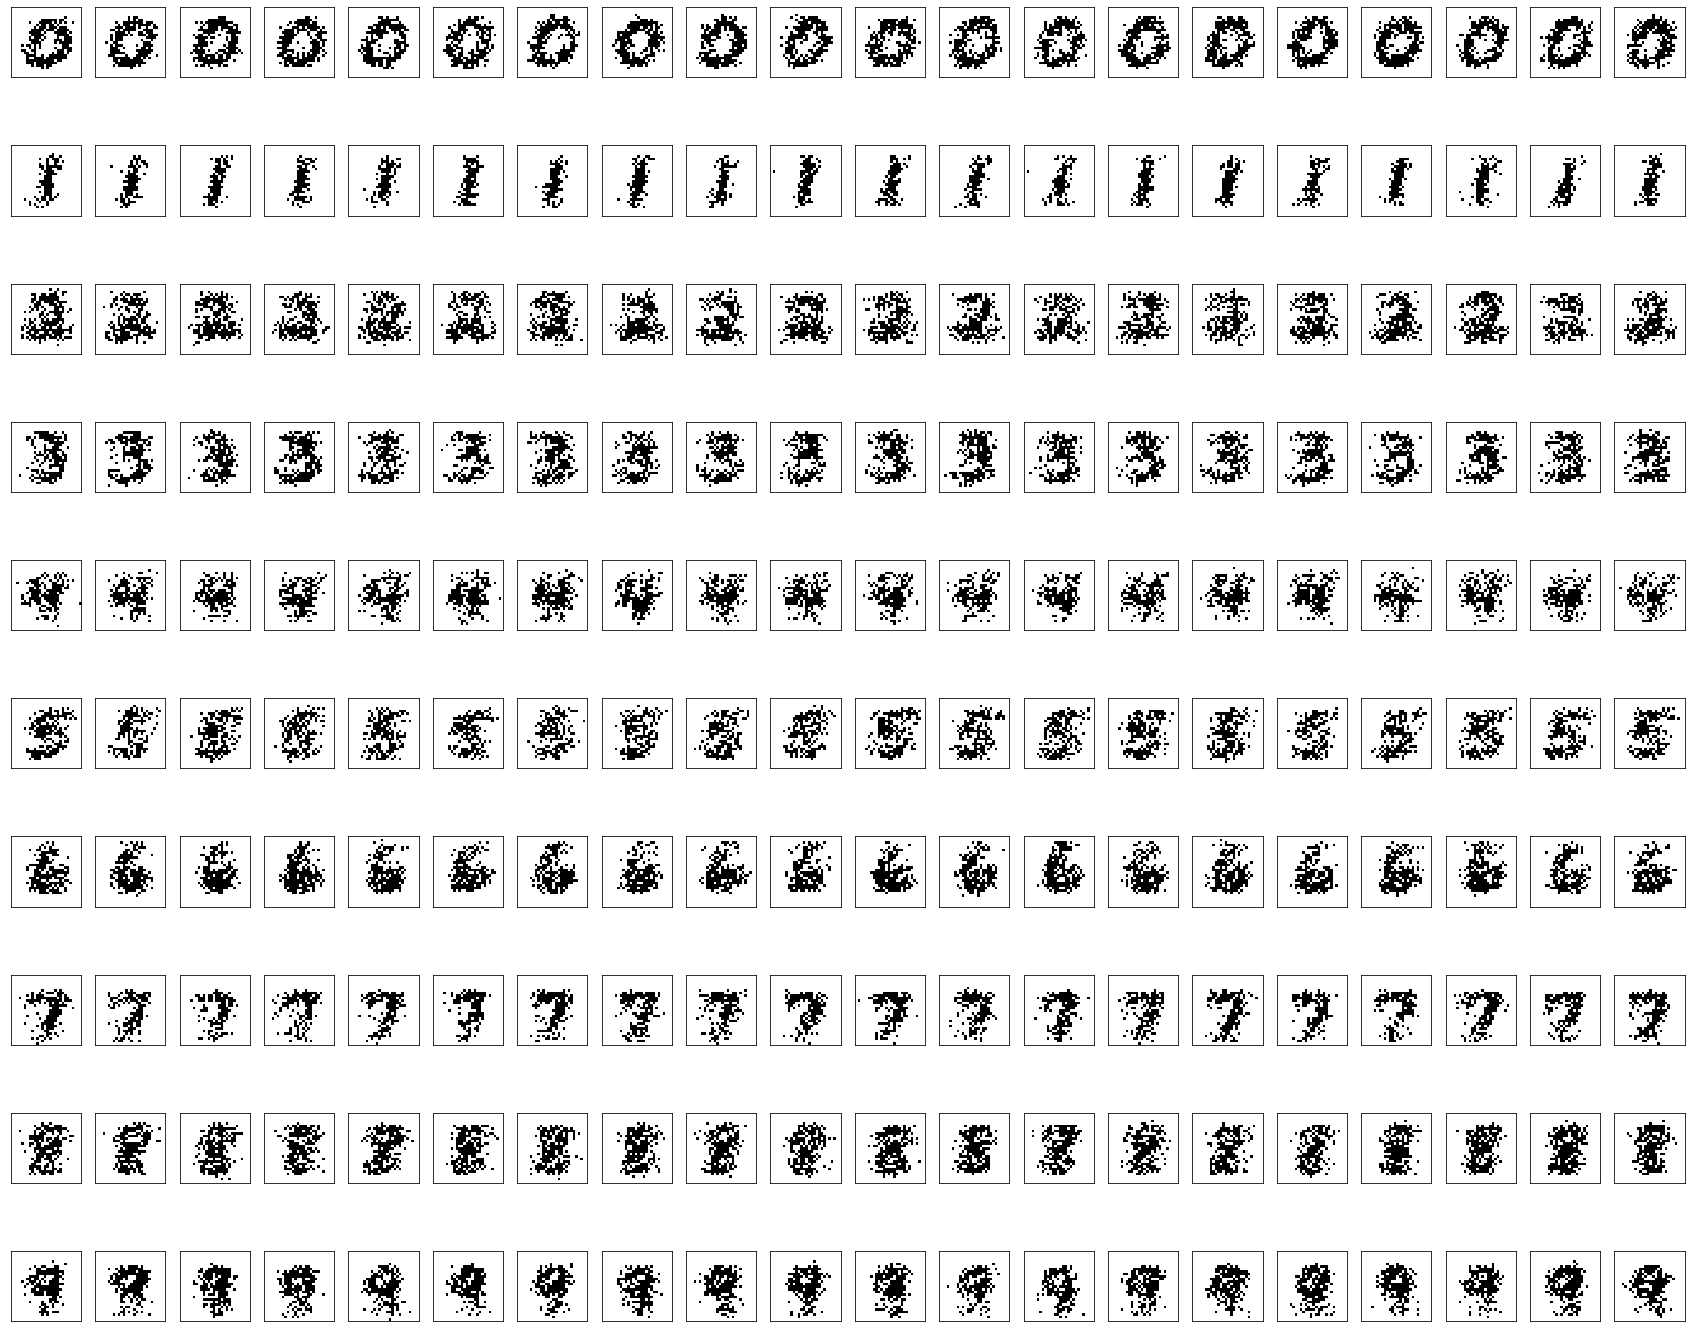

In [15]:
def P10(num_examples):

### STUDENT START ###
    clf = BernoulliNB(alpha = 0.001, binarize = 0.0)
    clf.fit(mini_train_data, mini_train_labels)
    
    digit_prob = np.exp(clf.feature_log_prob_)
    num_digits = np.shape(clf.feature_log_prob_)[0]
    num_pixel = np.shape(clf.feature_log_prob_)[1]
    
    plt.figure(figsize = (30, 25))
    for i in range(num_digits): 
        for j in range(num_examples):
            # Binarize each pixel based on comparing randomly generated numbers to the
            # the estimated probability of the pixels
            rand_uni = np.random.rand(num_pixel)
            pixel_binary = np.where(digit_prob[i] > rand_uni, 1, 0)
            image = np.reshape(pixel_binary,(-1,28))
            plt.subplot(num_digits, num_examples, j+1+i*num_examples)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(image, cmap='Greys')

### STUDENT END ###

P10(20)

**ANSWER: the generated data are readable but less recognizable than the training data. In most of the images, most of the black pixels forms digits in a hand-writing fashion but few black pixels randomly and sparsely distributed around the digits. This can be improved by slightly increasing the binarization threshold to reduce the chances of that pixels with a little of the digit edges being classified as a true black pixel.**

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [16]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    clf = BernoulliNB(alpha = 0.001, binarize = 0.0)
    clf.fit(mini_train_data, mini_train_labels)
    pred_val = clf.predict(dev_data)
    pred_prob = clf.predict_proba(dev_data)
    
    prev_bucket = 0
    for i, bucket in enumerate(buckets):
        for value, prob, label in zip(pred_val, pred_prob, dev_labels):
            # an indicator variable: 1 if the max probability in in the current bin
            is_in_bucket = 1 if max(prob) > prev_bucket and max(prob) <= bucket else 0
            total[i] += is_in_bucket
            
            # an indicator variable: 1 if the value is labelled correctly and the max
            # probability is in the current bin
            is_correct = 1 if value == label and is_in_bucket == 1 else 0
            correct[i] += is_correct

        prev_bucket = bucket
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d  accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0  accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31  accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67  accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59  accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46  accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62  accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33  accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43  accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659  accuracy = 0.938


**ANSWER: The Bernoulli Naive Bayes model is a weakly calibrated classfier because the accuracy is only 43.3% at 90% posterior probability of the predicted class and the accuracy improves as the posterior probability increases. It is not a strongly calibrated classfier because when the posterior probability is at 100% the accuracy is just above 90%, lower than the posterior probability.**

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [17]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()